# Defining the values of each knee
- Falcon
- Chimp
- Gorilla 
- Iguana


In [2]:
import itertools as iter
import numpy as np
import plotly.subplots as sp
import plotly.express as px

# Name - Numbat medial
# TO FILL
eleven_points_m_xx = [
    134.063, 151.875, 140.156, 147.656, 155.156,
    161.719, 165.938, 166.641, 165.469, 162.188, 157.5
]

eleven_points_m_yy = [
    178.594, 230.625, 180, 182.344, 187.031,
    191.953, 199.688, 207.422, 213.281, 220.313, 226.406
]

def ls_circle(xx, yy):
    asize = np.size(xx) # number of coordinate points given, at least 30 minimum for the Cobb's Method
    J = np.zeros((asize, 3)) # Jacobian matrix
    K = np.zeros(asize)

    for ix in range(0, asize):
        x = xx[ix]
        y = yy[ix]

        J[ix, 0] = x*x + y*y
        J[ix, 1] = x
        J[ix, 2] = y
        K[ix] = 1.0

    K = K.transpose()
    JT = J.transpose()
    JTJ = np.dot(JT, J)
    InvJTJ = np.linalg.inv(JTJ)

    # Determining the coefficients
    ABC = np.dot(InvJTJ, np.dot(JT, K))
    A = ABC[0]
    B = ABC[1]
    C = ABC[2]

    xofs = -B / (2 * A) # x-coordinate of the center
    yofs = -C / (2 * A) # y-coordinate of the center
    R = np.sqrt(4 * A + B*B + C*C) / (2 * A) # radius of the best fit circle
    if R < 0.0: # can't have a negative radius
        R = -R

    return xofs, yofs, R

# Calculate for all 11 points
eleventh_result_m = ls_circle(eleven_points_m_xx, eleven_points_m_yy)  # This is the gold standard 
print("Gold standard:", eleventh_result_m)

# List to store results
scatter_results = []

# Iterate over different values of n
for n in range(3, 12):
    combinations = list(iter.combinations(zip(eleven_points_m_xx, eleven_points_m_yy), n))
    
    # List to store radii for each combination
    radii_list = []

    for combo in combinations:
        xx, yy = zip(*combo)
        result = ls_circle(xx, yy)
        radii_list.append(result[2])
        scatter_results.append({"n": n, "radius": result[2]})

# Create a scatter plot for radii with adjusted shades of blue
fig = px.scatter(scatter_results, x="n", y="radius", color="n",
                 title="Analysis of Radius Variability with Different Numbers of Points", color_continuous_scale='Blues',
                 range_color=[0, 0.6])  # Adjust the range to emphasize darker shades

# Add a line for the gold standard radius
fig.add_shape(
    type='line',
    x0=3,
    y0=eleventh_result_m[2],
    x1=11,
    y1=eleventh_result_m[2],
    line=dict(color='red', dash='dash'),
    name='Gold Standard Radius'
)

# Show the plot
fig.show()


Gold standard: (138.73332831192263, 206.9509751533086, 27.26663321486674)


In [3]:
from functions import extract_data

# Define data for each animal
octopus_data = {
    'Slice': 501,
    'anterolateral pt': (299.414, 176.025),
    'anteromedial pt': (254.981, 159.277),
    'posterolateral pt': (277.197, 217.383),
    'posteromedial pt': (239.258, 212.598),
    'pt 1 (L)': (304.199, 181.836),
    'pt 2 (L)': (306.934, 187.988),
    'pt 3 (L)': (307.617, 194.141),
    'pt 4 (L)': (306.934, 200.293),
    'pt 5 (L)': (303.516, 205.762),
    'pt 6 (L)': (300.098, 211.231),
    'pt 7 (L)': (295.313, 215.332),
    'pt 8 (L)': (289.844, 216.699),
    'pt 9 (L)': (283.692, 217.383),
    'pt 10 (M)': (248.828, 160.645),
    'pt 11 (M)': (242.676, 163.379),
    'pt 12 (M)': (236.524, 166.797),
    'pt 13 (M)': (231.738, 172.266),
    'pt 14 (M)': (227.637, 179.102),
    'pt 15 (M)': (226.27, 187.305),
    'pt 16 (M)': (226.953, 195.508),
    'pt 17 (M)': (229.004, 202.344),
    'pt 18 (M)': (233.789, 208.496),
    'medial rad': 28.39,
    'lateral rad': 27.3,
    'LatAng': 120.194,
    'MedAng': 129.319,
    'MTT pt': (279.59, 166.797),
    'PCL insertion pt': (261.817, 210.547)
}

falcon_data = {
    'Slice': 304,
    'anterolateral pt': (64.414, 147.422),
    'anteromedial pt': (116.211, 139.453),
    'posterolateral pt': (78.359, 191.914),
    'posteromedial pt': (108.906, 191.914),
    'pt 1 (L)': (59.766, 151.406),
    'pt 2 (L)': (56.224, 155.391),
    'pt 3 (L)': (53.125, 162.031),
    'pt 4 (L)': (53.568, 168.672),
    'pt 5 (L)': (54.896, 175.312),
    'pt 6 (L)': (55.781, 181.953),
    'pt 7 (L)': (58.437, 188.594),
    'pt 8 (L)': (65.742, 194.57),
    'pt 9 (L)': (71.719, 192.578),
    'pt 10 (M)': (122.63, 142.552),
    'pt 11 (M)': (130.156, 148.086),
    'pt 12 (M)': (135.469, 155.391),
    'pt 13 (M)': (137.461, 163.359),
    'pt 14 (M)': (136.797, 171.328),
    'pt 15 (M)': (134.141, 177.969),
    'pt 16 (M)': (128.828, 183.281),
    'pt 17 (M)': (123.073, 187.265),
    'pt 18 (M)': (116.211, 190.586),
    'medial rad': 26.556,
    'lateral rad': 23.872,
    'LatAng': 104.058,
    'MedAng': 136.863,
    'MTT pt': (78.329, 131.484),
    'PCL insertion pt': (97.617, 189.922)
}

chimp_data = {
    'Slice': 505,
    'anterolateral pt': (62.422, 150.742),
    'anteromedial pt': (112.226, 132.812),
    'posterolateral pt': (86.328, 197.89),
    'posteromedial pt': (123.516, 188.594),
    'pt 1 (L)': (57.773, 156.719),
    'pt 2 (L)': (56.113, 163.359),
    'pt 3 (L)': (56.113, 170),
    'pt 4 (L)': (57.109, 176.64),
    'pt 5 (L)': (59.102, 182.617),
    'pt 6 (L)': (62.422, 189.258),
    'pt 7 (L)': (66.406, 194.57),
    'pt 8 (L)': (74.375, 196.562),
    'pt 9 (L)': (81.016, 196.894),
    'pt 10 (M)': (118.535, 135.801),
    'pt 11 (M)': (123.848, 138.789),
    'pt 12 (M)': (129.492, 143.769),
    'pt 13 (M)': (134.805, 150.078),
    'pt 14 (M)': (137.461, 156.055),
    'pt 15 (M)': (138.125, 163.359),
    'pt 16 (M)': (138.789, 171.992),
    'pt 17 (M)': (136.797, 178.633),
    'pt 18 (M)': (131.484, 183.945),
    'medial rad': 28.239,
    'lateral rad': 26.239,
    'LatAng': 106.37,
    'MedAng': 120.76,
    'MTT pt': (82.786, 134.583),
    'PCL insertion pt': (104.036, 185.937)
}

gorilla_data = {
    'Slice': 474,
    'anterolateral pt': (303.047, 195.469),
    'anteromedial pt': (258.047, 184.219),
    'posterolateral pt': (297.422, 235.547),
    'posteromedial pt': (252.422, 228.516),
    'pt 1 (L)': (307.969, 198.281),
    'pt 2 (L)': (310.781, 202.5),
    'pt 3 (L)': (311.484, 206.719),
    'pt 4 (L)': (312.891, 213.047),
    'pt 5 (L)': (312.891, 217.969),
    'pt 6 (L)': (311.484, 222.891),
    'pt 7 (L)': (310.078, 228.516),
    'pt 8 (L)': (306.562, 232.031),
    'pt 9 (L)': (302.344, 234.844),
    'pt 10 (M)': (252.773, 186.328),
    'pt 11 (M)': (248.203, 189.141),
    'pt 12 (M)': (244.336, 193.359),
    'pt 13 (M)': (240.469, 197.578),
    'pt 14 (M)': (238.711, 204.258),
    'pt 15 (M)': (238.359, 210.234),
    'pt 16 (M)': (239.766, 217.266),
    'pt 17 (M)': (241.875, 222.539),
    'pt 18 (M)': (246.094, 226.406),
    'medial rad': 26.025,
    'lateral rad': 22.538,
    'LatAng': 97.193,
    'MedAng': 112.834,
    'MTT pt': (290.742, 178.594),
    'PCL insertion pt': (271.758, 226.758)
}

iguana_data = {
    'Slice': 501,
    'anterolateral pt': (292.187, 172.324),
    'anteromedial pt': (243.047, 163.027),
    'posterolateral pt': (276.25, 216.152),
    'posteromedial pt': (249.023, 211.836),
    'pt 1 (L)': (296.836, 176.64),
    'pt 2 (L)': (300.156, 181.953),
    'pt 3 (L)': (302.148, 187.265),
    'pt 4 (L)': (302.148, 193.242),
    'pt 5 (L)': (301.484, 200.547),
    'pt 6 (L)': (298.828, 206.523),
    'pt 7 (L)': (295.508, 211.172),
    'pt 8 (L)': (290.195, 214.492),
    'pt 9 (L)': (284.219, 216.484),
    'pt 10 (M)': (238.066, 166.016),
    'pt 11 (M)': (232.422, 170),
    'pt 12 (M)': (229.101, 175.312),
    'pt 13 (M)': (227.109, 181.621),
    'pt 14 (M)': (227.773, 188.594),
    'pt 15 (M)': (229.765, 194.57),
    'pt 16 (M)': (232.422, 200.547),
    'pt 17 (M)': (237.07, 205.195),
    'pt 18 (M)': (243.047, 208.515),
    'medial rad': 25.94,
    'lateral rad': 24.91,
    'LatAng': 112.97,
    'MedAng': 123.464,
    'MTT pt': (274.922, 159.375),
    'PCL insertion pt': (261.64, 204.531)
}

jaguar_data = {
    'Slice': 488,
    'anterolateral pt': (137.5, 102.695),
    'anteromedial pt': (86.367, 94.102),
    'posterolateral pt': (122.031, 149.531),
    'posteromedial pt': (85.938, 147.383),
    'pt 1 (L)': (141.797, 107.852),
    'pt 2 (L)': (145.235, 113.008),
    'pt 3 (L)': (147.383, 119.024),
    'pt 4 (L)': (147.813, 124.61),
    'pt 5 (L)': (146.094, 131.055),
    'pt 6 (L)': (144.375, 137.5),
    'pt 7 (L)': (141.367, 143.086),
    'pt 8 (L)': (135.781, 146.524),
    'pt 9 (L)': (128.906, 148.242),
    'pt 10 (M)': (80.352, 96.68),
    'pt 11 (M)': (74.336, 100.977),
    'pt 12 (M)': (68.32, 106.133),
    'pt 13 (M)': (65.313, 113.008),
    'pt 14 (M)': (64.024, 121.172),
    'pt 15 (M)': (63.594, 129.766),
    'pt 16 (M)': (66.602, 137.07),
    'pt 17 (M)': (72.617, 141.797),
    'pt 18 (M)': (79.922, 145.235),
    'medial rad': 26.66,
    'lateral rad': 26.66,
    'LatAng': 106.414,
    'MedAng': 123.268,
    'MTT pt': (116.445, 88.516),
    'PCL insertion pt': (102.695, 142.656)
}

numbat_data = {
    'Slice': 496,
    'anterolateral pt': (88.945, 204.961),
    'anteromedial pt': (140.977, 179.648),
    'posterolateral pt': (118.125, 241.523),
    'posteromedial pt': (146.25, 230.977),
    'pt 1 (L)': (86.484, 210.234),
    'pt 2 (L)': (85.781, 216.562),
    'pt 3 (L)': (85.781, 222.188),
    'pt 4 (L)': (88.594, 227.461),
    'pt 5 (L)': (92.812, 232.031),
    'pt 6 (L)': (97.031, 236.953),
    'pt 7 (L)': (102.656, 240.469),
    'pt 8 (L)': (107.93, 242.578),
    'pt 9 (L)': (113.203, 242.578),
    'pt 10 (M)': (147.656, 181.406),
    'pt 11 (M)': (153.281, 184.922),
    'pt 12 (M)': (158.906, 189.141),
    'pt 13 (M)': (164.531, 195.469),
    'pt 14 (M)': (167.344, 203.203),
    'pt 15 (M)': (165.938, 209.531),
    'pt 16 (M)': (163.828, 217.266),
    'pt 17 (M)': (159.609, 223.594),
    'pt 18 (M)': (153.281, 227.812),
    'medial rad': 26.025,
    'lateral rad': 25.277,
    'LatAng': 99.689,
    'MedAng': 122.357,
    'MTT pt': (102.305, 182.109),
    'PCL insertion pt': (132.891, 223.594)
}

kangaroo_data = {
    'Slice': 518,
    'anterolateral pt': (73.867, 187.766),
    'anteromedial pt': (125.813, 183.477),
    'posterolateral pt': (98.172, 233.516),
    'posteromedial pt': (120.094, 234.469),
    'pt 1 (L)': (70.055, 193.723),
    'pt 2 (L)': (67.195, 200.633),
    'pt 3 (L)': (65.051, 207.305),
    'pt 4 (L)': (64.336, 215.168),
    'pt 5 (L)': (67.91, 222.316),
    'pt 6 (L)': (73.629, 226.606),
    'pt 7 (L)': (79.348, 230.18),
    'pt 8 (L)': (85.305, 231.609),
    'pt 9 (L)': (91.023, 233.039),
    'pt 10 (M)': (132.961, 187.289),
    'pt 11 (M)': (138.68, 192.293),
    'pt 12 (M)': (142.254, 198.727),
    'pt 13 (M)': (144.398, 206.59),
    'pt 14 (M)': (143.922, 213.977),
    'pt 15 (M)': (141.539, 221.602),
    'pt 16 (M)': (137.25, 227.32),
    'pt 17 (M)': (131.531, 231.609),
    'pt 18 (M)': (125.813, 234.469),
    'medial rad': 26.459,
    'lateral rad': 25.03,
    'LatAng': 122.525,
    'MedAng': 124.561,
    'MTT pt': (92.93, 174.899),
    'PCL insertion pt': (106.75, 228.274)
}

armadillo_data = {
    'Slice': 521,
    'anterolateral pt': (300.469, 185.156),
    'anteromedial pt': (246.094, 176.719),
    'posterolateral pt': (277.031, 228.75),
    'posteromedial pt': (252.187, 227.812),
    'pt 1 (L)': (303.75, 191.25),
    'pt 2 (L)': (307.266, 197.578),
    'pt 3 (L)': (307.969, 203.906),
    'pt 4 (L)': (307.266, 209.531),
    'pt 5 (L)': (304.453, 215.859),
    'pt 6 (L)': (301.641, 222.188),
    'pt 7 (L)': (297.422, 227.812),
    'pt 8 (L)': (289.688, 228.516),
    'pt 9 (L)': (283.359, 228.516),
    'pt 10 (M)': (240.469, 180),
    'pt 11 (M)': (235.547, 184.922),
    'pt 12 (M)': (231.328, 190.547),
    'pt 13 (M)': (227.812, 197.578),
    'pt 14 (M)': (227.109, 205.312),
    'pt 15 (M)': (228.516, 213.047),
    'pt 16 (M)': (232.031, 219.375),
    'pt 17 (M)': (237.656, 223.594),
    'pt 18 (M)': (244.688, 226.406),
    'medial rad': 27.78,
    'lateral rad': 26.38,
    'LatAng': 107.103,
    'MedAng': 128.687,
    'MTT pt': (279.357, 167.813),
    'PCL insertion pt': (262.5, 222.188)
}

llama_data = {
    'Slice': 465,
    'anterolateral pt': (290.195, 151.406),
    'anteromedial pt': (249.023, 134.805),
    'posterolateral pt': (268.945, 190.586),
    'posteromedial pt': (236.406, 179.297),
    'pt 1 (L)': (293.958, 155.833),
    'pt 2 (L)': (297.057, 160.703),
    'pt 3 (L)': (298.164, 166.68),
    'pt 4 (L)': (298.385, 172.656),
    'pt 5 (L)': (296.836, 178.633),
    'pt 6 (L)': (293.515, 184.609),
    'pt 7 (L)': (288.203, 188.594),
    'pt 8 (L)': (282.226, 189.922),
    'pt 9 (L)': (275.586, 190.586),
    'pt 10 (M)': (243.047, 137.461),
    'pt 11 (M)': (237.734, 140.117),
    'pt 12 (M)': (232.422, 144.101),
    'pt 13 (M)': (227.773, 148.75),
    'pt 14 (M)': (225.117, 154.726),
    'pt 15 (M)': (224.453, 161.367),
    'pt 16 (M)': (225.117, 168.008),
    'pt 17 (M)': (227.773, 173.984),
    'pt 18 (M)': (231.758, 177.969),
    'medial rad': 24.579,
    'lateral rad': 21.96,
    'LatAng': 110.062,
    'MedAng': 134.019,
    'MTT pt': (276.25, 140.781),
    'PCL insertion pt': (253.229, 180.182)
}

# # Extract and analyze data for each animal
# datasets = [octopus_data, falcon_data, chimp_data, gorilla_data, iguana_data, jaguar_data, numbat_data, kangaroo_data, armadillo_data, llama_data]
# for data in datasets:
#     slice_number, medial_rad, lateral_rad, LatAng, MedAng, lateral_values, medial_values, mtt_pt, pcl_insertion_pt = extract_data(data)
#     print(f"Medial values for {data['Slice']}: {medial_values}")


## Method of least squares to fit circles

### Calculation of Circle Coefficients $(ABC)$

The coefficients $(A)$, $(B)$, and $(C)$ in the circle equation $Ax^2 + Bx + Cy + 1 = 0$ are determined using the least squares method. Adjusting these can change the shape, position and the radius of the circle. 

### Equation for the Jacobian Matrix $(J)$
The Jacobian matrix, denoted as $(J)$, is defined as
$$
J = \begin{bmatrix} x_1^2 + y_1^2 & x_1 & y_1 \\ \vdots & \vdots & \vdots \\ x_n^2 + y_n^2 & x_n & y_n \end{bmatrix}
$$
Where $(x_i, y_i)$ are the coordinates given, in this case focused on the posterior ends of the medial and lateral tibial plateau. Each row corresponds to a data point, with the first column representing the sum of squared coordinates, and the second and third columns representing individual coordinates. 

### Objective Function Components
Let $(K)$ be a column vector of ones, and $(J)$ be the Jacobian matrix. The objective function components are given by the residuals (error?) The objective is to minimize the residuals, which are the differences between the observed data and the values predicted by the model.
$$
\begin{align*}
K = \begin{bmatrix} 1 \\ \vdots \\ 1 \end{bmatrix} \\
\end{align*}
$$
     
### Normal Equation Components
Let $(J^T)$ be the transpose of the Jacobian matrix, $(J^TJ$) be the product of $(J^T)$ and $(J)$, and $(InvJ^TJ)$ be the inverse of $(J^TJ)$. The components are given by:
$$
\begin{align*}
J^T &= \text{Transpose of } J \\
J^TJ &= J^T \cdot J \\
InvJ^TJ &= \text{Inverse of } J^TJ
\end{align*}
$$

### Solution Vector $(ABC)$
$(A)$, $(B)$, and $(C)$ are the coefficients of the fitted circle that we aim to determine through the least squares method. The solution vector $(ABC)$ is given by:
$$
ABC = InvJ^TJ \cdot J^T \cdot K
$$

### Circle Parameters

The parameters of the fitted circle, namely $(A)$, $(B)$, and $(C)$, are extracted from $(ABC)$.
$$
\begin{align*}
A &= ABC[0] \\
B &= ABC[1] \\
C &= ABC[2]
\end{align*}
$$

### Circle Center and Radius
The center coordinates $(x_{\text{ofs}}, y_{\text{ofs}})$ and the radius $(R)$ of the fitted circle are given by:
$$
\begin{align*}
x_{\text{ofs}} &= -\frac{B}{2A} \\
y_{\text{ofs}} &= -\frac{C}{2A} \\
R &= \frac{\sqrt{4A + B^2 + C^2}}{2A}
\end{align*}
$$

Side note: If $(R < 0)$, then $(R = -R)$


## Aim: To store the gold standards of the angular difference between Cobb and the MTT axis but calculating it with all 11 points.

1. Now find the gold standard angles between the MTT axis and the Cobb axis

In [5]:
# Import necessary functions from the functions module
from functions import line_from_two_points, perpendicular_line_through_centers, angle_between_lines

# Define dictionaries to store the results
MTT_axis = {}  # Stores the MTT Axis slope for each knee dataset
gold_Cobbs_axis = {}  # Stores the Gold Cobb's Axis slope for each knee dataset

# Define a dictionary to store the angles
angle_between_lines_dict = {}

# List of all knee datasets along with their respective data
knee_datasets = {
    "Falcon": falcon_data,
    "Chimp": chimp_data,
    "Gorilla": gorilla_data,
    "Iguana": iguana_data,
    "Jaguar": jaguar_data,
    "Octopus": octopus_data,
    "Numbat": numbat_data,
    "Kangaroo": kangaroo_data,
    "Armadillo": armadillo_data,
    "Llama": llama_data
}

# Iterate over each knee dataset
for knee_name, knee_data in knee_datasets.items():
    # Extract MTT and PCL insertion points from the current knee dataset
    mtt_pt = knee_data.get('MTT pt', None)
    pcl_insertion_pt = knee_data.get('PCL insertion pt', None)

    # Calculate the slope and y-intercept of the line passing through MTT and PCL insertion points
    m, b = line_from_two_points(mtt_pt, pcl_insertion_pt)
    MTT_axis[knee_name] = (m, b)

    # Extract medial and lateral values from the current knee dataset
    _, _, _, _, _, lateral_values, medial_values, _, _ = extract_data(knee_data)

    # Calculate the perpendicular line passing through the centers of medial and lateral circles
    m_perpendicular, b_perpendicular = perpendicular_line_through_centers(lateral_values, medial_values)
    gold_Cobbs_axis[knee_name] = (m_perpendicular, b_perpendicular)

    # Calculate the angle between the lines
    m1, _ = MTT_axis[knee_name]
    m2 = gold_Cobbs_axis[knee_name][0]
    angle = angle_between_lines(m1, m2)
    angle_between_lines_dict[knee_name] = angle

# Print out the calculated MTT Axis, Gold Cobb's Axis, and angles for all knee datasets
print("MTT Axis:", MTT_axis)
print("Gold Cobb's Axis:", gold_Cobbs_axis)
print("Angles between lines:")
print(angle_between_lines_dict)


MTT Axis: {'Falcon': (3.0297594359187037, -105.83402685607612), 'Chimp': (2.416658823529412, -65.48251736470593), 'Gorilla': (-2.5370838600927055, 916.2308356510734), 'Iguana': (-3.399789188375235, 1094.0518432464964), 'Jaguar': (-3.9374545454545453, 547.0128945454545), 'Octopus': (-2.4615990547459674, 855.035479716425), 'Numbat': (1.3563395017328193, 43.34868727522394), 'Kangaroo': (3.8621562952243145, -184.01118451519557), 'Armadillo': (-3.2256629293468535, 1068.924518953549), 'Llama': (-1.7115242604578431, 613.5895769514791)}
Gold Cobb's Axis: {'Falcon': (7.788254207517141, -561.3936644913384), 'Chimp': (4.345111076858724, -250.44295625026183), 'Gorilla': (-4.51822241209056, 1459.2373134169482), 'Iguana': (-3.7533106803471994, 1186.8248343398786), 'Jaguar': (-12.096365404931298, 1406.4678686961918), 'Octopus': (-5.685942536691714, 1723.143586105315), 'Numbat': (2.8474745408631796, -149.53341405044233), 'Kangaroo': (-36.1412628789834, 3976.6832249657323), 'Armadillo': (-14.7890563213

So if we're assuming the MTT to be reproducible, then the Cobb Axis also seems reproducible except for the Iguana? So angle_between_lines_dict{} has the gold standard for the angle, now we are going to keep removing points and see the the circle produces a Cobb's Axis which has the same angular difference from the MTT and does not change.

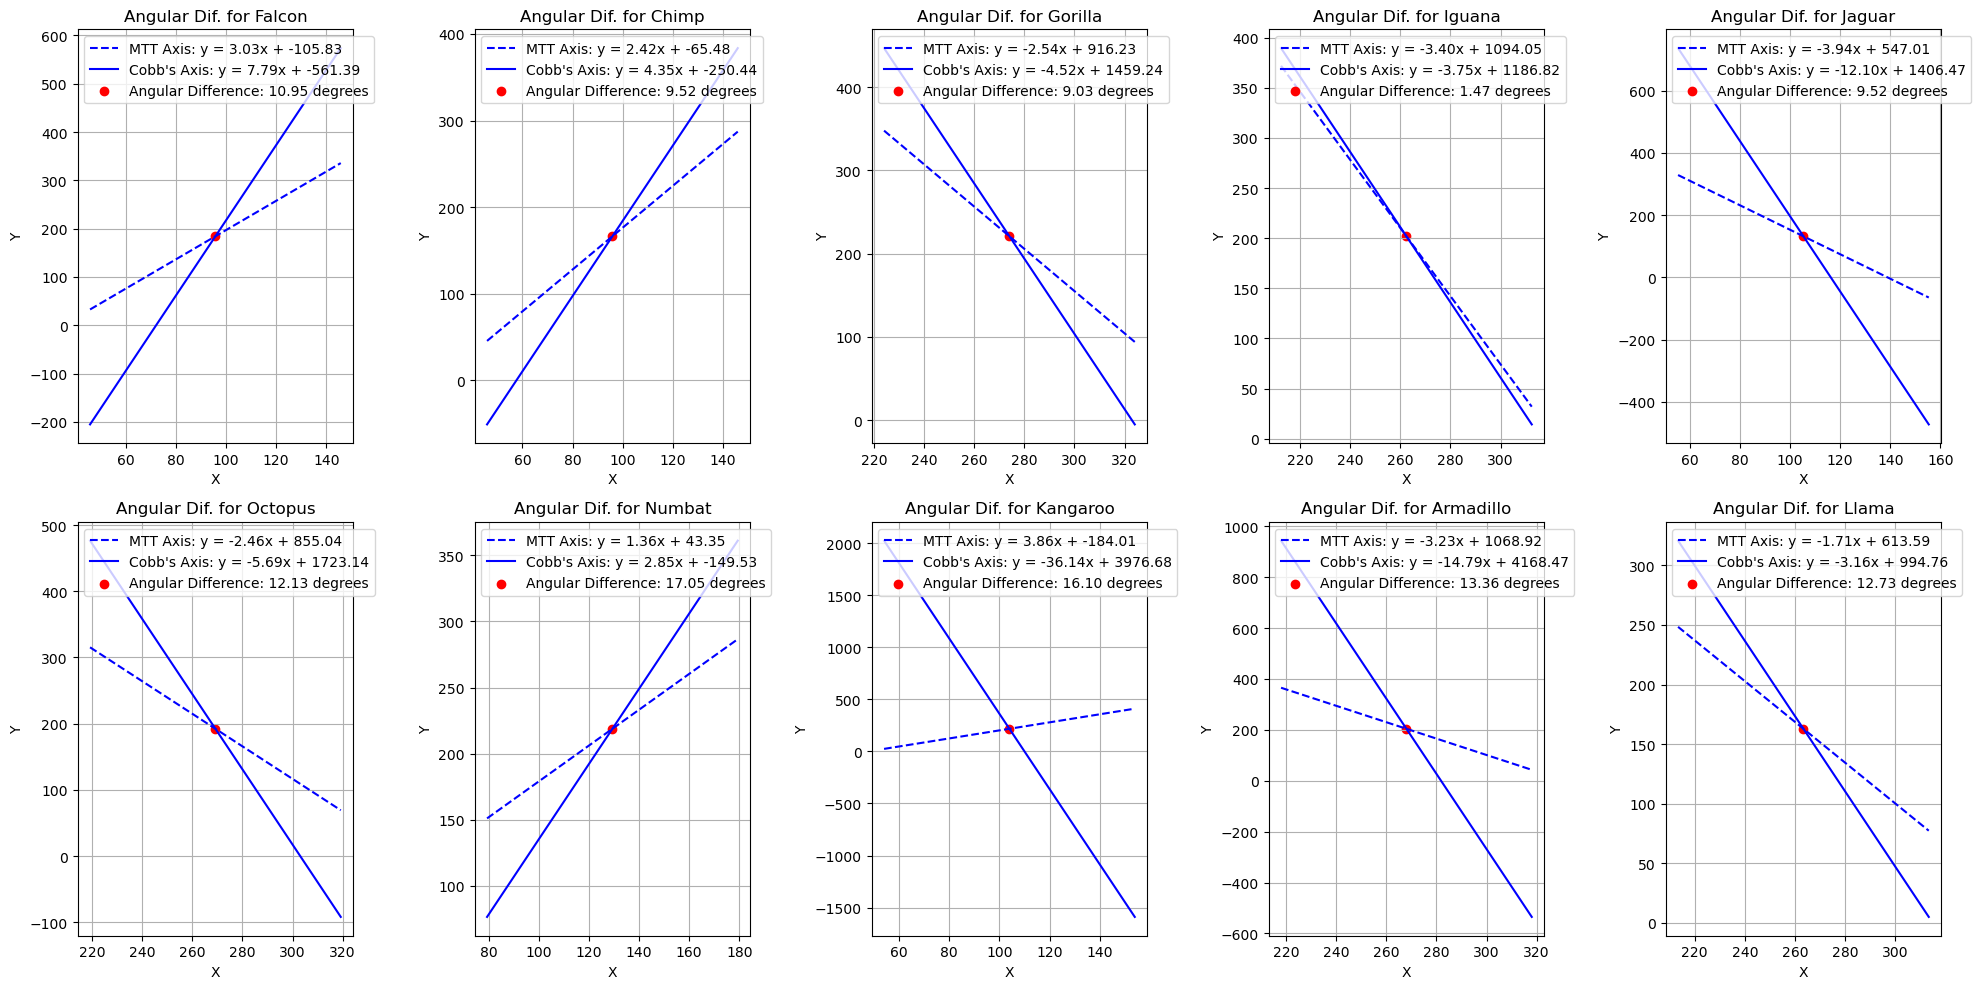

<Figure size 2000x1000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot knee data
def plot_knee_data(knee_name, m1, b1, m2, b2, x_intersect, y_intersect, angle):
    # Define x values for plotting the lines around the intersection
    x_values = np.linspace(x_intersect - 50, x_intersect + 50, 100)

    # Calculate y values for MTT Axis and Gold Cobb's Axis lines
    y_mtt = m1 * x_values + b1
    y_cobbs = m2 * x_values + b2

    # Plot MTT Axis and Gold Cobb's Axis lines
    plt.plot(x_values, y_mtt, label=f"MTT Axis: y = {m1:.2f}x + {b1:.2f}", linestyle='--', color='blue')
    plt.plot(x_values, y_cobbs, label=f"Cobb's Axis: y = {m2:.2f}x + {b2:.2f}", color='blue')
    plt.scatter(x_intersect, y_intersect, color='red', label=f'Angular Difference: {angle:.2f} degrees')  # Plot intersection point

    # Set plot title and labels
    plt.title(f"Angular Dif. for {knee_name}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc='upper left')

    # Add grid
    plt.grid(True)

# Initialize subplot parameters
plt.figure(figsize=(20, 10))
num_plots_per_row = 5
plot_index = 1

# Iterate over each knee dataset
for knee_name, knee_data in knee_datasets.items():
    # Extract MTT Axis and Gold Cobb's Axis from the corresponding dictionaries
    m1, b1 = MTT_axis[knee_name]
    m2, b2 = gold_Cobbs_axis[knee_name]
    
    # Calculate the intersection point
    x_intersect = (b2 - b1) / (m1 - m2)
    y_intersect = m1 * x_intersect + b1
    
    # Calculate the angle between the lines
    angle = angle_between_lines(m1, m2)

    # Create a new subplot
    plt.subplot(2, num_plots_per_row, plot_index)
    plot_knee_data(knee_name, m1, b1, m2, b2, x_intersect, y_intersect, angle)
    
    # Increment plot index
    plot_index += 1

    # Check if the maximum number of plots per row has been reached
    if plot_index > num_plots_per_row * 2:
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(20, 10))
        plot_index = 1

# Show the remaining plots
plt.tight_layout()
plt.show()


Before Removal:
Lateral Values (Original): [(300.469, 185.156), (277.031, 228.75), (303.75, 191.25), (307.266, 197.578), (307.969, 203.906), (307.266, 209.531), (304.453, 215.859), (301.641, 222.188), (297.422, 227.812), (289.688, 228.516), (283.359, 228.516)]
Medial Values (Original): [(246.094, 176.719), (252.187, 227.812), (240.469, 180), (235.547, 184.922), (231.328, 190.547), (227.812, 197.578), (227.109, 205.312), (228.516, 213.047), (232.031, 219.375), (237.656, 223.594), (244.688, 226.406)]

After Removal:
Lateral Values (New): [(300.469, 185.156), (297.422, 227.812), (289.688, 228.516)]
Medial Values (New): [(246.094, 176.719), (235.547, 184.922), (232.031, 219.375), (244.688, 226.406)]

Metrics:
ANGLE (degrees):
Original: 13.35584
New: 12.16291

CIRCLE CENTER POINTS:
Original (Lateral): (283.55199655849424, 204.75434792238613)
Original (Medial): (252.62244051598748, 202.66296660835752)
New (Lateral): (291.5333471848129, 205.95453568987026)
New (Medial): (252.8889410723247, 20

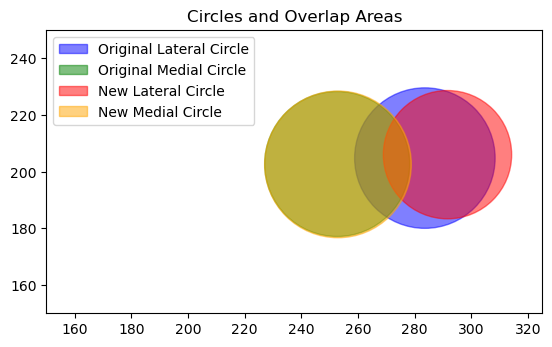

(([(300.469, 185.156), (297.422, 227.812), (289.688, 228.516)],
  [(246.094, 176.719),
   (235.547, 184.922),
   (232.031, 219.375),
   (244.688, 226.406)]),
 ([(300.469, 185.156), (297.422, 227.812), (289.688, 228.516)],
  [(246.094, 176.719),
   (235.547, 184.922),
   (232.031, 219.375),
   (244.688, 226.406)]))

In [49]:
import numpy as np
import math
from functions import ls_circle, calc_angle, get_mtt


def recurse_remove(lateral_values, medial_values, MTT, mode="M", threshold=1, original_angle=-1):
    """
    Recursively remove points from either lateral or medial values based on the provided mode.

    Parameters:
        lateral_values (list): List of lateral values.
        medial_values (list): List of medial values.
        MTT (tuple): MTT (MidTibialTuberosity) point coordinates.
        mode (str): Mode for point removal. Either "M" for medial or "L" for lateral. Defaults to "M".
        threshold (float): Threshold value for angle difference. Defaults to 1.
        original_angle (float): Original angle. Defaults to -1.

    Returns:
        tuple: Tuple containing filtered lateral and medial values.
    """
    points = None
    all_angles = []

    # Calculate original angle if not provided
    if original_angle == -1:
        original_angle = calc_angle(MTT, lateral_values, medial_values)

    # Select points based on mode
    if mode == "L":
        points = lateral_values
    elif mode == "M":
        points = medial_values
    else:
        raise ValueError("Invalid mode. Use 'M' for medial or 'L' for lateral.")

    # Check if points are below threshold or if no points are left
    if len(points) <= 3:
        if mode == "L":
            return points, medial_values
        elif mode == "M":
            return lateral_values, points

    # Calculate angles and find index with the closest angle to original angle
    for i in range(len(points)):
        if mode == "L":
            angle = calc_angle(MTT, points[:i] + points[i + 1:], medial_values)
        else:
            angle = calc_angle(MTT, lateral_values, points[:i] + points[i + 1:])
        all_angles.append(angle)

    abs_angle_diffs = [abs(angle - original_angle) for angle in all_angles]
    min_index = abs_angle_diffs.index(min(abs_angle_diffs))

    # Check if threshold is met
    if abs(all_angles[min_index] - original_angle) > threshold:
        #print("[ DEBUG ]  - Threshold met")
        if mode == "L":
            return points, medial_values
        elif mode == "M":
            return lateral_values, points

    # Recursively remove points and return filtered values
    if mode == "L":
        return recurse_remove(points[:min_index] + points[min_index + 1:], medial_values, MTT, mode, threshold, original_angle)
    else:
        return recurse_remove(lateral_values, points[:min_index] + points[min_index + 1:], MTT, mode, threshold, original_angle)


def determine_min_points(knee_data):
    """
    Determine the minimum points required for circle fitting and evaluate metrics.

    Parameters:
        knee_data: Input knee data.

    Returns:
        tuple: Tuple containing two sets of points after recursive removal.
    """
    
    slice_number, medial_rad, lateral_rad, LatAng, MedAng, lateral_values, medial_values, mtt_pt, pcl_insertion_pt = extract_data(knee_data)
    mtt = get_mtt(knee_data)
    
    # Remove points starting with lateral
    lateral_values_new, medial_values_new = recurse_remove(lateral_values, medial_values, mtt, "L")
    lateral_values_new, medial_values_new = recurse_remove(lateral_values_new, medial_values_new, mtt, "M")

    # Remove points starting with medial
    lateral_values_new2, medial_values_new2 = recurse_remove(lateral_values, medial_values, mtt, "M")
    lateral_values_new2, medial_values_new2 = recurse_remove(lateral_values_new2, medial_values_new2, mtt, "L")

    # print("--- LATERAL FIRST ---")
    # print("Before Removal:")
    # print("Lateral Values (Original):", lateral_values)
    # print("Medial Values (Original):", medial_values)
    # print("\nAfter Removal:")
    # print("Lateral Values (New):", lateral_values_new)
    # print("Medial Values (New):", medial_values_new)
    # print("\nMetrics:")
    # evaluate_metrics_for_points(lateral_values_new, medial_values_new, lateral_values, medial_values, mtt)

    print("Before Removal:")
    print("Lateral Values (Original):", lateral_values)
    print("Medial Values (Original):", medial_values)
    print("\nAfter Removal:")
    print("Lateral Values (New):", lateral_values_new2)
    print("Medial Values (New):", medial_values_new2)
    print("\nMetrics:")
    evaluate_metrics_for_points(lateral_values_new2, medial_values_new2, lateral_values, medial_values, mtt)

    return (lateral_values_new, medial_values_new), (lateral_values_new2, medial_values_new2)


def percentage_overlap_circle_area(x_main, y_main, r_main, x_other, y_other, r_other):
    """
    Calculate the percentage overlap area between two circles.

    Parameters:
        x_main (float): X-coordinate of the center of the main circle.
        y_main (float): Y-coordinate of the center of the main circle.
        r_main (float): Radius of the main circle.
        x_other (float): X-coordinate of the center of the other circle.
        y_other (float): Y-coordinate of the center of the other circle.
        r_other (float): Radius of the other circle.

    Returns:
        float: Percentage overlap area.
    """
    distance_centers = math.sqrt((x_other - x_main) ** 2 + (y_other - y_main) ** 2)

    if distance_centers >= r_main + r_other:
        return 0.0
    elif distance_centers <= abs(r_main - r_other) and r_main >= r_other:
        return (math.pi * r_other ** 2) / (math.pi * r_main ** 2) * 100
    elif distance_centers <= abs(r_main - r_other) and r_main < r_other:
        return 100

    theta1 = 2 * math.acos((r_main ** 2 - r_other ** 2 + distance_centers ** 2) / (2 * r_main * distance_centers))
    theta2 = 2 * math.acos((r_other ** 2 - r_main ** 2 + distance_centers ** 2) / (2 * r_other * distance_centers))
    area1 = 0.5 * r_main ** 2 * (theta1 - math.sin(theta1))
    area2 = 0.5 * r_other ** 2 * (theta2 - math.sin(theta2))
    overlap_area = area1 + area2

    return (overlap_area / (math.pi * r_main ** 2)) * 100


import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


def evaluate_metrics_for_points(lateral_values_new, medial_values_new, lateral_values, medial_values, mtt):
    """
    Evaluate metrics for the before and after points and visualize the circles and their overlap areas.

    Parameters:
        lateral_values_new (list): New lateral values after removal.
        medial_values_new (list): New medial values after removal.
        lateral_values (list): Original lateral values.
        medial_values (list): Original medial values.
        mtt (tuple): MTT (MidTibialTuberosity) point coordinates.
    """
    print("ANGLE (degrees):")
    print("Original:", round(calc_angle(mtt, lateral_values, medial_values), 5))
    print("New:", round(calc_angle(mtt, lateral_values_new, medial_values_new), 5))

    print("\nCIRCLE CENTER POINTS:")
    print("Original (Lateral):", ls_circle(*zip(*lateral_values))[:2])
    print("Original (Medial):", ls_circle(*zip(*medial_values))[:2])
    print("New (Lateral):", ls_circle(*zip(*lateral_values_new))[:2])
    print("New (Medial):", ls_circle(*zip(*medial_values_new))[:2])

    print("\nCIRCLE RADII:")
    print("Original (Lateral):", round(ls_circle(*zip(*lateral_values))[2], 5))
    print("Original (Medial):", round(ls_circle(*zip(*medial_values))[2], 5))
    print("New (Lateral):", round(ls_circle(*zip(*lateral_values_new))[2], 5))
    print("New (Medial):", round(ls_circle(*zip(*medial_values_new))[2], 5))

    print("\nPERCENTAGE OVERLAP:")
    print("Lateral:", round(percentage_overlap_circle_area(*ls_circle(*zip(*lateral_values_new)), *ls_circle(*zip(*lateral_values))), 5))
    print("Medial:", round(percentage_overlap_circle_area(*ls_circle(*zip(*medial_values_new)), *ls_circle(*zip(*medial_values))), 5))

    # Visualize circles and overlap area
    fig, ax = plt.subplots()

    # Original circles
    circle1 = Circle(ls_circle(*zip(*lateral_values))[:2], ls_circle(*zip(*lateral_values))[2], color='blue', alpha=0.5)
    circle2 = Circle(ls_circle(*zip(*medial_values))[:2], ls_circle(*zip(*medial_values))[2], color='green', alpha=0.5)
    ax.add_patch(circle1)
    ax.add_patch(circle2)

    # New circles
    circle3 = Circle(ls_circle(*zip(*lateral_values_new))[:2], ls_circle(*zip(*lateral_values_new))[2], color='red', alpha=0.5)
    circle4 = Circle(ls_circle(*zip(*medial_values_new))[:2], ls_circle(*zip(*medial_values_new))[2], color='orange', alpha=0.5)
    ax.add_patch(circle3)
    ax.add_patch(circle4)

    # Calculate overlap area
    overlap_area_lateral = percentage_overlap_circle_area(*ls_circle(*zip(*lateral_values_new)), *ls_circle(*zip(*lateral_values)))
    overlap_area_medial = percentage_overlap_circle_area(*ls_circle(*zip(*medial_values_new)), *ls_circle(*zip(*medial_values)))

    ax.set_aspect('equal', 'box')
    ax.set_xlim(150, 325)  # Adjust limits as needed
    ax.set_ylim(150, 250)  # Adjust limits as needed
    ax.set_title('Circles and Overlap Areas')
    ax.legend([circle1, circle2, circle3, circle4],
              ['Original Lateral Circle', 'Original Medial Circle', 'New Lateral Circle', 'New Medial Circle'],
              loc='upper left')

    plt.show()


# Example usage with chimp_data
determine_min_points(armadillo_data)


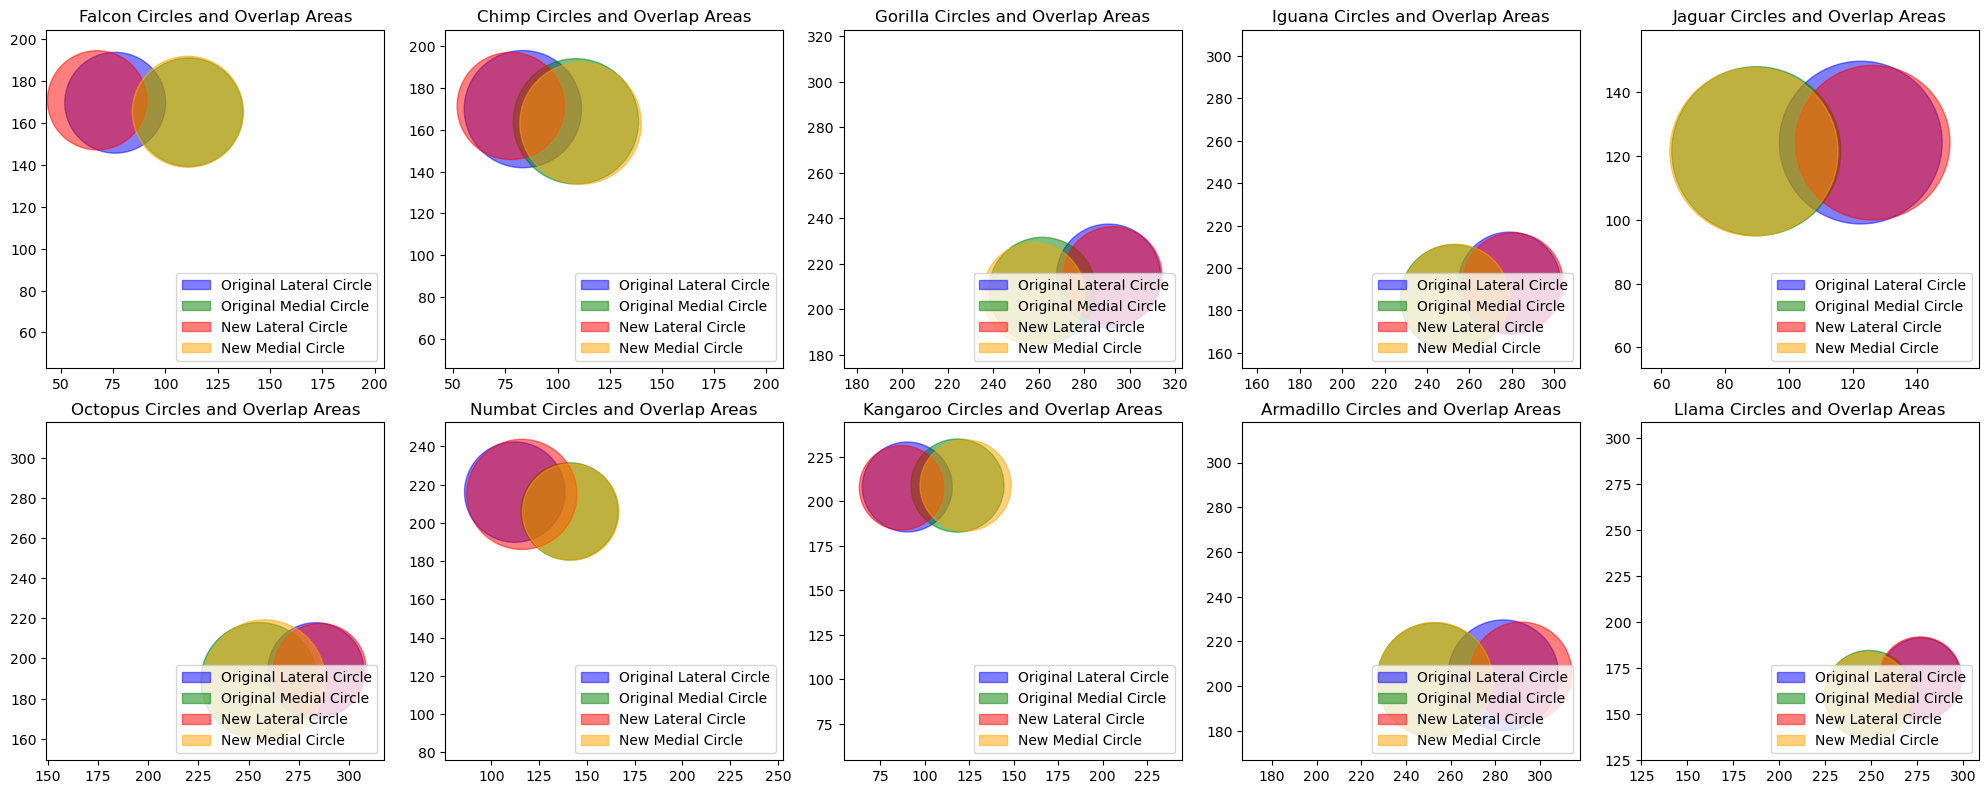

In [50]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

knee_datasets = {
    "Falcon": falcon_data,
    "Chimp": chimp_data,
    "Gorilla": gorilla_data,
    "Iguana": iguana_data,
    "Jaguar": jaguar_data,
    "Octopus": octopus_data,
    "Numbat": numbat_data,
    "Kangaroo": kangaroo_data,
    "Armadillo": armadillo_data,
    "Llama": llama_data
}

def evaluate_metrics_for_points(lateral_values_new, medial_values_new, lateral_values, medial_values, mtt):
    """
    Evaluate metrics for the before and after points and visualize the circles and their overlap areas.

    Parameters:
        lateral_values_new (list): New lateral values after removal.
        medial_values_new (list): New medial values after removal.
        lateral_values (list): Original lateral values.
        medial_values (list): Original medial values.
        mtt (tuple): MTT (MidTibialTuberosity) point coordinates.
    """
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))

    for i, (dataset_name, dataset) in enumerate(knee_datasets.items()):
        ax = axs[i // 5, i % 5]
        mtt = get_mtt(dataset)
        slice_number, medial_rad, lateral_rad, LatAng, MedAng, lateral_values, medial_values, mtt_pt, pcl_insertion_pt = extract_data(dataset)

        lateral_values_new, medial_values_new = recurse_remove(lateral_values, medial_values, mtt, "L")
        lateral_values_new, medial_values_new = recurse_remove(lateral_values_new, medial_values_new, mtt, "M")

        # Original circles
        circle1 = Circle(ls_circle(*zip(*lateral_values))[:2], ls_circle(*zip(*lateral_values))[2], color='blue', alpha=0.5)
        circle2 = Circle(ls_circle(*zip(*medial_values))[:2], ls_circle(*zip(*medial_values))[2], color='green', alpha=0.5)
        ax.add_patch(circle1)
        ax.add_patch(circle2)

        # New circles
        circle3 = Circle(ls_circle(*zip(*lateral_values_new))[:2], ls_circle(*zip(*lateral_values_new))[2], color='red', alpha=0.5)
        circle4 = Circle(ls_circle(*zip(*medial_values_new))[:2], ls_circle(*zip(*medial_values_new))[2], color='orange', alpha=0.5)
        ax.add_patch(circle3)
        ax.add_patch(circle4)

        # Update plot limits based on circle coordinates
        min_x = min(*np.min(lateral_values, axis=0), *np.min(medial_values, axis=0), *np.min(lateral_values_new, axis=0), *np.min(medial_values_new, axis=0))
        max_x = max(*np.max(lateral_values, axis=0), *np.max(medial_values, axis=0), *np.max(lateral_values_new, axis=0), *np.max(medial_values_new, axis=0))
        min_y = min(*np.min(lateral_values, axis=0), *np.min(medial_values, axis=0), *np.min(lateral_values_new, axis=0), *np.min(medial_values_new, axis=0))
        max_y = max(*np.max(lateral_values, axis=0), *np.max(medial_values, axis=0), *np.max(lateral_values_new, axis=0), *np.max(medial_values_new, axis=0))

        ax.set_aspect('equal', 'box')
        ax.set_xlim(min_x - 10, max_x + 10)  # Add some padding to the limits
        ax.set_ylim(min_y - 10, max_y + 10)  # Add some padding to the limits
        ax.set_title(f'{dataset_name} Circles and Overlap Areas')
        ax.legend([circle1, circle2, circle3, circle4],
                  ['Original Lateral Circle', 'Original Medial Circle', 'New Lateral Circle', 'New Medial Circle'],
                  loc='lower right')

    plt.tight_layout()
    plt.show()


evaluate_metrics_for_points(None, None, None, None, None)



Before Removal:
Lateral Values (Original): [(300.469, 185.156), (277.031, 228.75), (303.75, 191.25), (307.266, 197.578), (307.969, 203.906), (307.266, 209.531), (304.453, 215.859), (301.641, 222.188), (297.422, 227.812), (289.688, 228.516), (283.359, 228.516)]
Medial Values (Original): [(246.094, 176.719), (252.187, 227.812), (240.469, 180), (235.547, 184.922), (231.328, 190.547), (227.812, 197.578), (227.109, 205.312), (228.516, 213.047), (232.031, 219.375), (237.656, 223.594), (244.688, 226.406)]

After Removal:
Lateral Values (New): [(300.469, 185.156), (297.422, 227.812), (289.688, 228.516)]
Medial Values (New): [(246.094, 176.719), (235.547, 184.922), (232.031, 219.375), (244.688, 226.406)]

Metrics:


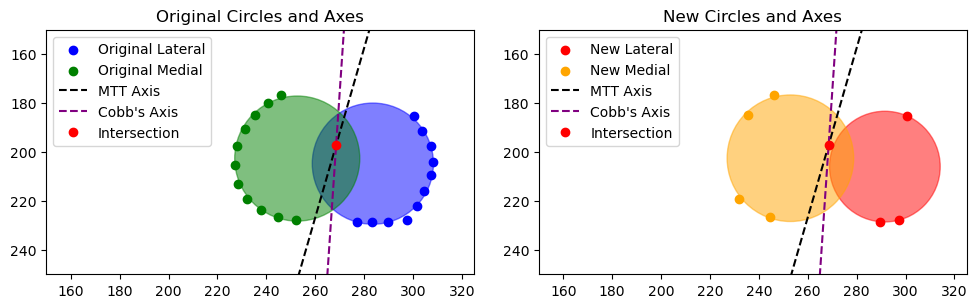

(([(300.469, 185.156), (297.422, 227.812), (289.688, 228.516)],
  [(246.094, 176.719),
   (235.547, 184.922),
   (232.031, 219.375),
   (244.688, 226.406)]),
 ([(300.469, 185.156), (297.422, 227.812), (289.688, 228.516)],
  [(246.094, 176.719),
   (235.547, 184.922),
   (232.031, 219.375),
   (244.688, 226.406)]))

In [69]:
def evaluate_metrics_for_points(lateral_values_new, medial_values_new, lateral_values, medial_values, mtt):
    """
    Evaluate metrics for the before and after points and visualize the circles and their overlap areas.

    Parameters:
        lateral_values_new (list): New lateral values after removal.
        medial_values_new (list): New medial values after removal.
        lateral_values (list): Original lateral values.
        medial_values (list): Original medial values.
        mtt (tuple): MTT (MidTibialTuberosity) point coordinates.
    """
    # Calculate angles
    original_angle = calc_angle(mtt, lateral_values, medial_values)
    new_angle = calc_angle(mtt, lateral_values_new, medial_values_new)

    # Calculate MTT and Cobb's axes
    m_mtt, b_mtt = line_from_two_points(mtt, pcl_insertion_pt)
    m_cobbs, b_cobbs = perpendicular_line_through_centers(lateral_values, medial_values)

    # Move MTT axis slightly to the right
    b_mtt_offset = b_mtt + 70  # Adjust the offset value as needed

    # Calculate intersection point of MTT and Cobb's axes
    x_intersect = (b_cobbs - b_mtt_offset) / (m_mtt - m_cobbs)
    y_intersect = m_mtt * x_intersect + b_mtt_offset
    intersect_point = (x_intersect, y_intersect)

    # Create figure and subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot original circles and axes
    axs[0].scatter(*zip(*lateral_values), color='blue', label='Original Lateral')
    axs[0].scatter(*zip(*medial_values), color='green', label='Original Medial')
    circle1 = Circle(ls_circle(*zip(*lateral_values))[:2], ls_circle(*zip(*lateral_values))[2], color='blue', alpha=0.5)
    circle2 = Circle(ls_circle(*zip(*medial_values))[:2], ls_circle(*zip(*medial_values))[2], color='green', alpha=0.5)
    axs[0].add_patch(circle1)
    axs[0].add_patch(circle2)
    axs[0].plot(np.linspace(150, 325, 100), m_mtt * np.linspace(150, 325, 100) + b_mtt_offset, color='black', linestyle='--', label=f"MTT Axis")
    axs[0].plot(np.linspace(150, 325, 100), m_cobbs * np.linspace(150, 325, 100) + b_cobbs, color='purple', linestyle='--', label="Cobb's Axis")
    axs[0].plot(intersect_point[0], intersect_point[1], 'ro', label='Intersection')
    axs[0].set_aspect('equal', 'box')
    axs[0].set_xlim(150, 325)
    axs[0].set_ylim(250, 150)  # Invert y-axis
    axs[0].legend()
    axs[0].set_title('Original Circles and Axes')

    # Plot new circles and axes
    axs[1].scatter(*zip(*lateral_values_new), color='red', label='New Lateral')
    axs[1].scatter(*zip(*medial_values_new), color='orange', label='New Medial')
    circle3 = Circle(ls_circle(*zip(*lateral_values_new))[:2], ls_circle(*zip(*lateral_values_new))[2], color='red', alpha=0.5)
    circle4 = Circle(ls_circle(*zip(*medial_values_new))[:2], ls_circle(*zip(*medial_values_new))[2], color='orange', alpha=0.5)
    axs[1].add_patch(circle3)
    axs[1].add_patch(circle4)
    axs[1].plot(np.linspace(150, 325, 100), m_mtt * np.linspace(150, 325, 100) + b_mtt_offset, color='black', linestyle='--', label=f"MTT Axis")
    axs[1].plot(np.linspace(150, 325, 100), m_cobbs * np.linspace(150, 325, 100) + b_cobbs, color='purple', linestyle='--', label="Cobb's Axis")
    axs[1].plot(intersect_point[0], intersect_point[1], 'ro', label='Intersection')
    axs[1].set_aspect('equal', 'box')
    axs[1].set_xlim(150, 325)
    axs[1].set_ylim(250, 150)  # Invert y-axis
    axs[1].legend()
    axs[1].set_title('New Circles and Axes')

    plt.tight_layout()
    plt.show()


# Example usage with armadillo_data
determine_min_points(armadillo_data)


In [71]:
from PIL import Image, ImageDraw

# Open the PNG image
image_path = "/Users/kalyani/Desktop/Chimp.png"
image = Image.open(image_path)

# Get the width and height of the image
width, height = image.size

# Access pixel data
pixel_data = image.load()

# Coordinate for the red circle
x = 112
y = 350

# Create a drawing object
draw = ImageDraw.Draw(image)

# Draw a red circle at the specified coordinate
circle_radius = 5
draw.ellipse((x - circle_radius, y - circle_radius, x + circle_radius, y + circle_radius), fill="red")

# Display the image with the red circle
image.show()


In [77]:
import numpy as np
from PIL import Image, ImageDraw

def ls_circle(xx, yy):
    asize = np.size(xx) # number of coordinate points given, at least 30 minimum for the Cobb's Method
    J = np.zeros((asize, 3)) # Jacobian matrix
    K = np.zeros(asize)

    for ix in range(0, asize):
        x = xx[ix]
        y = yy[ix]

        J[ix, 0] = x*x + y*y
        J[ix, 1] = x
        J[ix, 2] = y
        K[ix] = 1.0

    K = K.transpose()
    JT = J.transpose()
    JTJ = np.dot(JT, J)
    InvJTJ = np.linalg.inv(JTJ)

    # Determining the coefficients
    ABC = np.dot(InvJTJ, np.dot(JT, K))
    A = ABC[0]
    B = ABC[1]
    C = ABC[2]

    xofs = -B / (2 * A) # x-coordinate of the center
    yofs = -C / (2 * A) # y-coordinate of the center
    R = np.sqrt(4 * A + B*B + C*C) / (2 * A) # radius of the best fit circle
    if R < 0.0: # can't have a negative radius
        R = -R

    return xofs, yofs, R

def perpendicular_line_through_centers(lateral_points, medial_points):

    # Calculate centers of circles for lateral and medial points
    lateral_center = ls_circle([point[0] for point in lateral_points if point is not None], [point[1] for point in lateral_points if point is not None])
    medial_center = ls_circle([point[0] for point in medial_points if point is not None], [point[1] for point in medial_points if point is not None])

    # Calculate equation of the line passing through the centers
    x1, y1 = lateral_center[:2]
    x2, y2 = medial_center[:2]
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    # Calculate the slope of the perpendicular line
    m_perpendicular = -1 / m if m != 0 else float('inf')

    # The perpendicular line passes through the midpoint of the original line
    x_mid = (x1 + x2) / 2
    y_mid = (y1 + y2) / 2
    b_perpendicular = y_mid - m_perpendicular * x_mid

    return m_perpendicular, b_perpendicular

# Open the PNG image
image_path = "/Users/kalyani/Desktop/Chimp.png"
image = Image.open(image_path)

# Get the width and height of the image
width, height = image.size

# List of points to annotate (x, y)
points_to_annotate = [(163, 190), (196, 554), (317, 572)]

# List of points for the second set
points_to_annotate_2 = [(573, 43), (667, 503), (717, 134), (776, 422)]

# Create a drawing object
draw = ImageDraw.Draw(image)

# Draw red circles at the specified points for the first set
circle_radius = 5
for point in points_to_annotate:
    x, y = point
    draw.ellipse((x - circle_radius, y - circle_radius, x + circle_radius, y + circle_radius), fill="red")

# Draw red circles at the specified points for the second set
for point in points_to_annotate_2:
    x, y = point
    draw.ellipse((x - circle_radius, y - circle_radius, x + circle_radius, y + circle_radius), fill="red")

# Extract x and y coordinates from points for both sets
xx = [point[0] for point in points_to_annotate]
yy = [point[1] for point in points_to_annotate]
xx_2 = [point[0] for point in points_to_annotate_2]
yy_2 = [point[1] for point in points_to_annotate_2]

# Plot the resulting circle from ls_circle for the first set
circle_x, circle_y, circle_radius = ls_circle(xx, yy)
draw.ellipse((circle_x - circle_radius, circle_y - circle_radius, circle_x + circle_radius, circle_y + circle_radius), outline="cyan", width=3)

# Plot the resulting circle from ls_circle for the second set
circle_x_2, circle_y_2, circle_radius_2 = ls_circle(xx_2, yy_2)
draw.ellipse((circle_x_2 - circle_radius_2, circle_y_2 - circle_radius_2, circle_x_2 + circle_radius_2, circle_y_2 + circle_radius_2), outline="cyan", width=3)

# Calculate the perpendicular line passing through the centers of the medial and lateral circles
m_perpendicular, b_perpendicular = perpendicular_line_through_centers(list(zip(xx, yy)), list(zip(xx_2, yy_2)))

# Print the equation of the perpendicular line
print(f"Perpendicular line equation: y = {m_perpendicular:.2f}x + {b_perpendicular:.2f}")

# Plot the perpendicular line
min_x = min(min(xx), min(xx_2))
max_x = max(max(xx), max(xx_2))
x_values = [min_x, max_x]
y_values = [m_perpendicular * x + b_perpendicular for x in x_values]
draw.line((x_values[0], y_values[0], x_values[1], y_values[1]), fill="red", width=3)

# Calculate the centers of the circles
center_x_1, center_y_1 = circle_x, circle_y
center_x_2, center_y_2 = circle_x_2, circle_y_2

# Draw a line connecting the centers of the circles
draw.line((center_x_1, center_y_1, center_x_2, center_y_2), fill="blue", width=3)

# Display the annotated image
image.show()


Perpendicular line equation: y = 4.01x + -1363.69
